## Funciones de distribución de probabilidades
### Distribución uniforme

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
a = 1
b = 100
n = 1000000
data = np.random .uniform(a, b, n)

(array([100287.,  99709., 100047., 100387., 100050.,  99959.,  99827.,
         99715.,  99965., 100054.]),
 array([ 1.00007671, 10.90004661, 20.80001651, 30.69998641, 40.59995631,
        50.49992621, 60.39989611, 70.29986601, 80.19983591, 90.09980581,
        99.99977571]),
 <BarContainer object of 10 artists>)

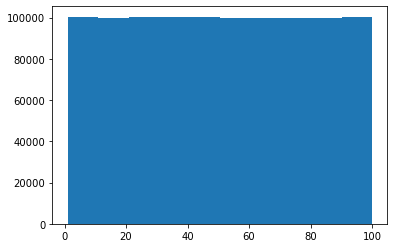

In [5]:
%matplotlib inline
plt.hist(data)

## Distribucion normal

In [6]:
data  = np.random.randn(1000000)

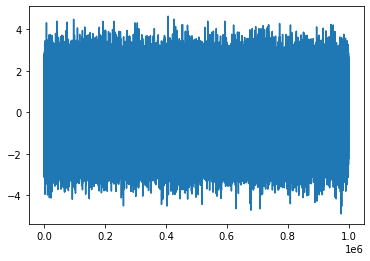

In [7]:
x = range(1, 1000001)
plt.plot(x, data)# cumple con ser una distribucion normal

(array([4.50000e+01, 1.37800e+03, 1.93130e+04, 1.18010e+05, 3.08149e+05,
        3.46812e+05, 1.68259e+05, 3.48580e+04, 3.04200e+03, 1.34000e+02]),
 array([-4.89780077, -3.94468343, -2.99156608, -2.03844874, -1.08533139,
        -0.13221405,  0.8209033 ,  1.77402064,  2.72713799,  3.68025533,
         4.63337268]),
 <BarContainer object of 10 artists>)

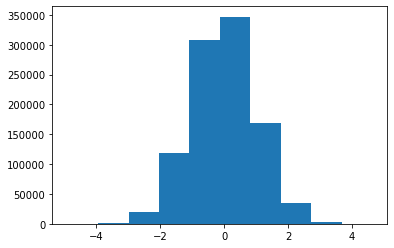

In [8]:
plt.hist(data)

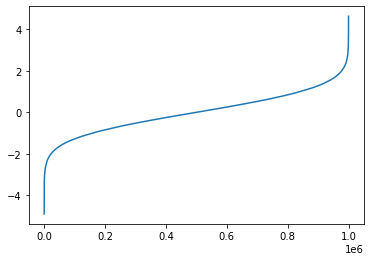

In [9]:
plt.plot(x, sorted(data))#funcion de distribucion acomulada

(array([2.100e+01, 2.050e+02, 8.490e+02, 2.285e+03, 3.053e+03, 2.313e+03,
        1.009e+03, 2.300e+02, 3.200e+01, 3.000e+00]),
 array([-3.44610029, -1.47259284,  0.5009146 ,  2.47442205,  4.4479295 ,
         6.42143695,  8.3949444 , 10.36845184, 12.34195929, 14.31546674,
        16.28897419]),
 <BarContainer object of 10 artists>)

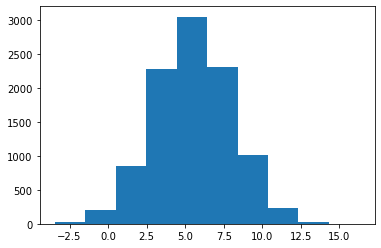

In [10]:
mu = 5.5
sd = 2.5
z_10000 = np.random.randn(10000)
data = mu + sd * z_10000# z = (X - mu) / sd -> N(0,1), X = mu + sd * z
plt.hist(data)

In [11]:
data = np.random.randn(2, 4)
data
# Sirve para generar datasets aleatorios

array([[-1.78616064,  1.96954202,  1.23687603, -0.23047008],
       [ 0.03548578, -1.29925306,  0.66633492, -1.3885384 ]])

## Simulación de Monte Carlo

* Generamos dos números aleatorios uniformes x e y entre 0 y 1
* Calcularemos x² + y²
       *Si el valor es inferior a 1 -> estamos dentro del círculo.
       *Si el valor es superior a 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total
  de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número suficiente de veces (por ejemplo 1000), para obtener (1000) diferentes
  aproximaciones de pi.
* Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final de pi.

In [33]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(a):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])

            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/a
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.14632


(3.14632, [<matplotlib.lines.Line2D at 0x7f9e42486d60>])

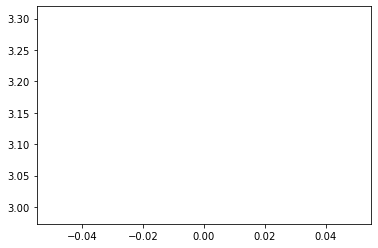

In [34]:
pi_montecarlo(100000, 200)

### Dummy Data Sets

In [38]:
data = pd.DataFrame(
    {
        'A': np.random.randn(10),
        'B': 1.5 + 2.5 * np.random.randn(10),
        'C': np.random.uniform(2, 32, 10)
    }
)

In [39]:
data

,A,B,C
0,0.014640,1.265323,2.439952
1,0.801679,5.030979,24.891265
2,0.751686,2.460412,15.407330
3,-1.221276,2.679048,17.350579
4,0.507537,5.157548,3.939605
5,0.460012,0.924491,10.974523
6,1.609839,0.886442,21.197388
7,-0.221652,2.401149,29.120744
8,0.936634,5.223882,29.379497
9,0.938235,0.758526,25.609401
